# Yuxiao Zheng | Homework 4   

# Polynomial regression

An example projection onto orthogonal columns, where each feature is another degree of the polynomial. We use a widely available dataset of the date of peak bloom for the cherry blossoms in D.C. as predicted by the year.

JMA October 2024

In [2]:
# An example of the typical imports for data science notebook
# not all will be used here

# Import python standard library
import re, os, sys, time
import math
from pathlib import Path

# Import array and dataframe packages
import numpy as np
import numpy.linalg as la
from numpy.random import default_rng
import pandas as pd

# A library specific to colab for mounting Google Drive folders
# from google.colab import drive

# Import ML & stats packages
# import sklearn as sk
# import scipy as sp     # for the binom(n,k) function
# use statsmodels to compute regression standard errors
# scikit learn doesn't compute them.
import statsmodels.api as sm

# Import the bokeh python wrappers for javascript plots
#  - a preferred visualization tool
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, VBar, Span
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [3]:
# # Get access to the file system on Google Drive
# 
# DATA_DIR = '/content/drive/My Drive/ISE201_fall2024/data'
# # This function will bring up a dialog to authenticate using your
# # Google identity
# if not Path('/content/drive/').exists():
#   drive.mount('/content/drive/')
# os.chdir(DATA_DIR)
# !ls

In [4]:
# Define the path to the data directory
DATA_DIR = Path('../data')

# Load the cherry blossom data
raw_blossom_data = pd.read_csv(Path(DATA_DIR) / Path('cherry-blossoms_fig-1.csv'), header =6)
raw_blossom_data.head()

,Year,Yoshino peak bloom date,Cherry blossom festival start date,Cherry blossom festival duration
0,1921,79,NaN,NaN
1,1922,97,NaN,NaN
2,1923,99,NaN,NaN
3,1924,104,NaN,NaN
4,1925,86,NaN,NaN


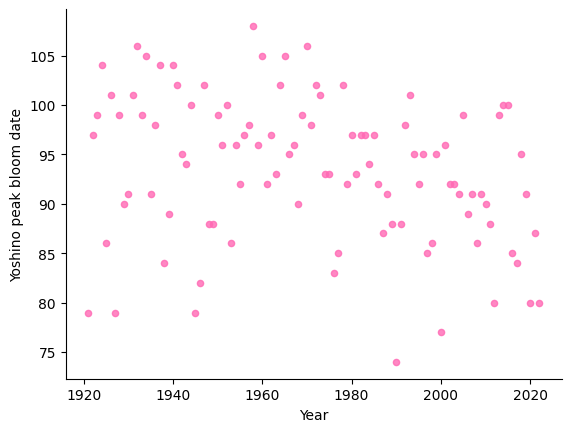

In [5]:
# @title Year vs Yoshino peak bloom date

from matplotlib import pyplot as plt
raw_blossom_data.plot(kind='scatter', x='Year', y='Yoshino peak bloom date', s=20, alpha=.8, color='hotpink')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
# Project the dependent variable on the 3 orthogonal columns, apply a 2nd degree  polynomial.

outcome = np.array(raw_blossom_data['Yoshino peak bloom date'])
n = len(outcome)

def unit_len(v):
  return v / la.norm(v)

# Center the year series
year_centered =  raw_blossom_data['Year'] - raw_blossom_data['Year'].mean()

linear = unit_len(np.array(year_centered))
ones = unit_len(np.ones((len(year_centered),)))
quadratic = unit_len((np.square(linear) - np.square(linear).mean()))

# cubic = cube(linear)
cubic = np.power(linear, 3)

design_matrix = np.vstack([ones, linear, quadratic]).T
pd.DataFrame(design_matrix).head()

,0,1,2
0,0.099015,-0.169825,0.214986
1,0.099015,-0.166463,0.202215
2,0.099015,-0.163100,0.189699
3,0.099015,-0.159737,0.177438
4,0.099015,-0.156374,0.165433


In [7]:
la.norm(ones), la.norm(linear), la.norm(quadratic)

(0.9999999999999999, 1.0, 1.0)

In [8]:
# Check orthogonality of the columns
np.round(np.dot(ones,linear)), np.round(np.dot(ones,quadratic), 6), np.round(np.dot(linear,quadratic), 6)

(0.0, -0.0, 0.0)

In [9]:
# To project the polynomial terms, 1, x & x^2 onto the peak bloom date

# The coefficients of the projection
zero_order = np.dot(outcome, ones)
first_order = np.dot(outcome, linear)
second_order = np.dot(outcome, quadratic)
zero_order, first_order, second_order


(944.4027264911521, -20.93055873625101, -15.279592153233377)

In [10]:
# Assemble the full projection

peak_bloom_projection = zero_order * ones + first_order * linear +second_order * quadratic
projection_df = pd.DataFrame(peak_bloom_projection, columns = ['projection'], index= raw_blossom_data.Year).reset_index()
projection_df.head()

,Year,projection
0,1921,93.779445
1,1922,93.904200
2,1923,94.025053
3,1924,94.142003
4,1925,94.255050


In [11]:
predicted_data = pd.merge(projection_df,\
                            raw_blossom_data[['Year', 'Yoshino peak bloom date']])
src = ColumnDataSource(predicted_data)
p = figure(title = '2nd order fit to Peak Bloom Date')
p.scatter(x= 'Year', y='Yoshino peak bloom date', source=src , color='hotpink', size=5)
p.line(x= 'Year', y='projection', source=src, color='blue')
show(p)

In [12]:
# Compute the error for the fit

def root_mean_squared_error(actual, predicted, df):
  error = df[actual] - df[predicted]
  return np.sqrt(np.mean(np.square(error)))

'Root mean squared error', root_mean_squared_error('Yoshino peak bloom date', 'projection', predicted_data)

('Root mean squared error', 6.8784516972889715)

## Repeat this regression, applying  Gram-Schmidt orthogonalization to create higher-order columns

Expand the projection by adding an ortho-normal column for higher order terms. You can use Gram-Schmidt to create new columns.

For instance, create the 3rd order column by starting with the cubed year:

  `cube = np.vectorize(lambda x: pow(x, 3))`

New columns need to be made orthogonal to the previous columns, and normalized to unit length for the projection to work.

 Check the error (it should decrease).  Show the plot for the new projection.   

## Implementing Gram-Schmidt orthogonalization to create higher-order columns
1. use the previous codes to generate required data
2. create the 3rd order column by starting with the cubed year:
  `cube = np.vectorize(lambda x: pow(x, 3))`
3. New columns need to be made orthogonal to the previous columns
4. use bokeh package to plot the graph following previouse graph
5. generate 3rd order column by starting with the cubed year!
6. Check the error (it should decrease). Show the plot for the new projection.



In [16]:
import numpy as np
import pandas as pd
from numpy import linalg as la
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource

# Assume raw_blossom_data is already loaded with the necessary columns

# Step 1: Define the unit_len function and vectorized cube function
def unit_len(v):
    return v / la.norm(v)

cube = np.vectorize(lambda x: pow(x, 3))

# Step 2: Create orthogonal columns using Gram-Schmidt process

### use the original codes don't need to change.
outcome = np.array(raw_blossom_data['Yoshino peak bloom date'])
year_centered = raw_blossom_data['Year'] - raw_blossom_data['Year'].mean()
linear = unit_len(np.array(year_centered))
ones = unit_len(np.ones(len(year_centered)))
quadratic = unit_len(np.square(linear) - np.square(linear).mean())
cubic_raw = cube(linear)

# Orthogonalize cubic term
### just follow the formula in textbook
cubic = cubic_raw - np.dot(cubic_raw, ones) * ones
cubic = cubic - np.dot(cubic, linear) * linear
cubic = cubic - np.dot(cubic, quadratic) * quadratic
cubic = unit_len(cubic)

# Step 3: Construct the design matrix and compute the projection
design_matrix = np.vstack([ones, linear, quadratic, cubic]).T

### generate my parameters
coefficients = [np.dot(outcome, col) for col in [ones, linear, quadratic, cubic]]
projection = sum(coeff * col for coeff, col in zip(coefficients, [ones, linear, quadratic, cubic]))

# Step 4: Create DataFrame with the projection
projection_df = pd.DataFrame({
    'Year': raw_blossom_data['Year'],
    'projection': projection
})

# Merge with actual data to include 'Yoshino peak bloom date'
### use previouse predicted_data
predicted_data = pd.merge(projection_df, raw_blossom_data[['Year', 'Yoshino peak bloom date']])
src = ColumnDataSource(predicted_data)



# Check the error (it should decrease). Show the plot for the new projection.
rmse = root_mean_squared_error('Yoshino peak bloom date', 'projection', predicted_data)
print("Root mean squared error with cubic term:", rmse)


# Step 5: Plot using Bokeh
p = figure(title='3rd Order Fit to Peak Bloom Date')
p.scatter(x='Year', y='Yoshino peak bloom date', source=src, color='hotpink', size=5)
p.line(x='Year', y='projection', source=src, color='blue')
show(p)


Root mean squared error with cubic term: 6.866592806905607
